In [11]:
import firebase_admin
from firebase_admin import credentials
from firebase_admin import firestore
import collections
import matplotlib.pyplot as plt
from nltk.corpus import inaugural
import nltk
from wordcloud import WordCloud,STOPWORDS

In [2]:
# Initialize Firebase Admin SDK and Firestore
cred = credentials.Certificate('./.streamlit/key.json')
firebase_admin.initialize_app(cred)
db = firestore.client()


In [3]:

# Get all documents in the "users" collection
queries = db.collection('queries')
docs = queries.stream()

# Initialize variables for analysis
total_queries = 0
query = []
number = []
time = []
# Analyze each document in the collection
for doc in docs:
    data = doc.to_dict()
    total_queries += 1
    query.append(data["query"])
    number.append(data["number"])
    time.append(data["timestamp"])
    # Check if user is active or inactive

    # Print analysis results
print('Total Queries:', total_queries)
    

Total Queries: 51


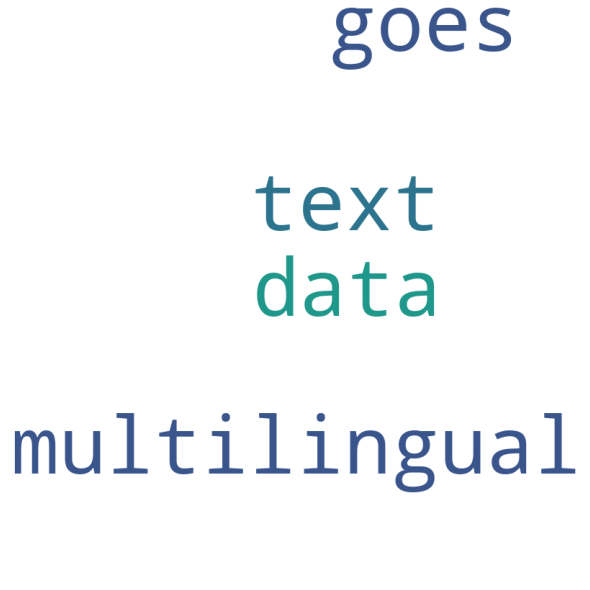

In [16]:
from wordcloud import WordCloud

text_data = " ".jo

wordcloud = WordCloud(width = 800, height = 800, background_color ='white', 
                min_font_size = 10).generate(text_data) 

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 
